In [1]:
import pandas as pd

pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# Load Data

In [2]:
import time
import polars as pl
import numpy as np


# load data
t1 = time.time()
df_0 = pl.read_parquet('./data/train.parquet/partition_id=0/part-0.parquet')
df_1 = pl.read_parquet('./data/train.parquet/partition_id=1/part-0.parquet')
df_2 = pl.read_parquet('./data/train.parquet/partition_id=2/part-0.parquet')
df_3 = pl.read_parquet('./data/train.parquet/partition_id=3/part-0.parquet')
df_4 = pl.read_parquet('./data/train.parquet/partition_id=4/part-0.parquet')
df_5 = pl.read_parquet('./data/train.parquet/partition_id=5/part-0.parquet')
df_6 = pl.read_parquet('./data/train.parquet/partition_id=6/part-0.parquet')
df_7 = pl.read_parquet('./data/train.parquet/partition_id=7/part-0.parquet')
df_8 = pl.read_parquet('./data/train.parquet/partition_id=8/part-0.parquet')
df_9 = pl.read_parquet('./data/train.parquet/partition_id=9/part-0.parquet')
t2 = time.time()
print('Elapsed time [s]:', np.round(t2-t1,4))

Elapsed time [s]: 10.1336


In [3]:
import gc # garbage collector

# combine in one data frame
df = pl.concat([df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9])

# clean up
del df_0,df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9
gc.collect();

In [7]:
df

date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,…,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
i16,i16,i8,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,i8,i8,i16,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0,1,3.889038,null,null,null,null,null,0.851033,0.242971,0.2634,-0.891687,11,7,76,-0.883028,0.003067,-0.744703,null,-0.169586,null,-1.335938,-1.707803,0.91013,null,1.636431,1.522133,-1.551398,-0.229627,null,null,1.378301,-0.283712,0.123196,null,null,…,0.204797,null,null,-0.808103,null,-2.037683,0.727661,null,-0.989118,-0.345213,-1.36224,null,null,null,null,null,-1.251104,-0.110252,-0.491157,-1.02269,0.152241,-0.659864,null,null,-0.261412,-0.211486,-0.335556,-0.281498,0.738489,-0.069556,1.380875,2.005353,0.186018,1.218368,0.775981,0.346999,0.095504
0,0,7,1.370613,null,null,null,null,null,0.676961,0.151984,0.192465,-0.521729,11,7,76,-0.865307,-0.225629,-0.582163,null,0.317467,null,-1.250016,-1.682929,1.412757,null,0.520378,0.744132,-0.788658,0.641776,null,null,0.2272,0.580907,1.128879,null,null,…,1.172836,null,null,-1.625862,null,-1.410017,1.063013,null,0.888355,0.467994,-1.36224,null,null,null,null,null,-1.065759,0.013322,-0.592855,-1.052685,-0.393726,-0.741603,null,null,-0.281207,-0.182894,-0.245565,-0.302441,2.965889,1.190077,-0.523998,3.849921,2.626981,5.0,0.703665,0.216683,0.778639
0,0,9,2.285698,null,null,null,null,null,1.056285,0.187227,0.249901,-0.77305,11,7,76,-0.675719,-0.199404,-0.586798,null,-0.814909,null,-1.296782,-2.040234,0.639589,null,1.597359,0.657514,-1.350148,0.364215,null,null,-0.017751,-0.317361,-0.122379,null,null,…,0.535897,null,null,-0.72542,null,-2.29417,1.764551,null,-0.120789,-0.063458,-1.36224,null,null,null,null,null,-0.882604,-0.072482,-0.617934,-0.86323,-0.241892,-0.709919,null,null,0.377131,0.300724,-0.106842,-0.096792,-0.864488,-0.280303,-0.326697,0.375781,1.271291,0.099793,2.109352,0.670881,0.772828
0,0,10,0.690606,null,null,null,null,null,1.139366,0.273328,0.306549,-1.262223,42,5,150,-0.694008,3.004091,0.114809,null,-0.251882,null,-1.902009,-0.979447,0.241165,null,-0.392359,-0.224699,-2.129397,-0.855287,null,null,0.404142,-0.578156,0.105702,null,null,…,2.413415,null,null,1.313203,null,-0.810125,2.939022,null,3.988801,1.834661,-1.36224,null,null,null,null,null,-0.697595,1.074309,-0.206929,-0.530602,4.765215,0.571554,null,null,-0.226891,-0.251412,-0.215522,-0.296244,0.408499,0.223992,2.294888,1.097444,1.225872,1.225376,1.114137,0.775199,-1.379516
0,0,14,0.44057,null,null,null,null,null,0.9552,0.262404,0.344457,-0.613813,44,3,16,-0.947351,-0.030018,-0.502379,null,0.646086,null,-1.844685,-1.58656,-0.182024,null,-0.969949,-0.673813,-1.282132,-1.399894,null,null,0.043815,-0.320225,-0.031713,null,null,…,1.253902,null,null,0.476195,null,-0.771732,2.843421,null,1.379815,0.411827,-1.36224,null,null,null,null,null,-0.948601,-0.136814,-0.447704,-1.141761,0.099631,-0.661928,null,null,3.678076,2.793581,2.61825,3.418133,-0.373387,-0.502764,-0.348021,-3.928148,-1.591366,-5.0,-3.57282,-1.089123,-5.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,

# Features

In [5]:
features = ['feature_' + str(x).zfill(2) for x in range(78+1)]

In [4]:
# basic stats
df[features].describe()

statistic,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,…,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.3945286e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6827091e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.5918039e7,4.7127077e7,4.69255e7,4.7127112e7,4.7127112e7,4.7127338e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,3.8691353e7,4.7127338e7,4.7127338e7,4.7127338e7,3.8691353e7,4.6648881e7,4.6648881e7,4.7127338e7,4.7127338e7,…,4.2826689e7,4.7059482e7,4.6034326e7,4.6810175e7,4.6810175e7,4.7127251e7,4.7127338e7,4.7127338e7,4.287324e7,4.7113533e7,4.608244e7,4.287324e7,4.7113533e7,4.608244e7,4.7127112e7,4.7127112e7,4.6648886e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6834511e7,4.6899772e7,4.6889675e7,4.6810175e7,4.6810175e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.6643579e7,4.6643579e7,4.7068908e7,4.7068908e7,4.7107295e7,4.7107295e7
"""null_count""",3.182052e6,3.182052e6,3.182052e6,3.182052e6,3.182052e6,0.0,0.0,0.0,300247.0,0.0,0.0,0.0,0.0,0.0,0.0,1.209299e6,261.0,201838.0,226.0,226.0,0.0,8.435985e6,0.0,0.0,0.0,0.0,8.435985e6,8.435985e6,0.0,0.0,0.0,8.435985e6,478457.0,478457.0,0.0,0.0,…,4.300649e6,67856.0,1.093012e6,317163.0,317163.0,87.0,0.0,0.0,4.254098e6,13805.0,1.044898e6,4.254098e6,13805.0,1.044898e6,226.0,226.0,478452.0,0.0,0.0,0.0,292827.0,227566.0,237663.0,317163.0,317163.0,0.0,0.0,0.0,0.0,0.0,0.0,483759.0,483759.0,58430.0,58430.0,20043.0,20043.0
"""mean""",0.573833,0.010192,0.573102,0.572745,-0.000852,-0.03838,-0.005058,-0.013839,0.082467,32.762992,4.875799,170.69312,-0.038973,-0.026642,-0.041218,-0.251219,-0.20489,-0.242808,-0.008927,-0.031894,-0.209704,0.037687,0.067906,0.072203,0.572287,0.092576,-0.049244,-0.234434,-0.155543,-0.215313,-0.2576,0.036165,0.420549,-0.015209,0.446928,0.445089,…,-0.063039,-0.053906,-0.080351,0.023377,-0.042955,-0.010571,-0.00172,-0.004013,-0.075708,-0.097575,-0.103892,0.074961,0.048527,0.086814,-0.028328,0.027874,-0.015198,-0.002545,-0.00665,0.012388,-0.179578,-0.145254,-0.166556,-0.043152,-0.050118,-0.042604,-0.023995,-0.040502,-0.032992,-0.021157,-0.036682,-0.016559,-0.023103,-0.002237,-0.008022,-0.00659,-0.012559
"""std""",1.327413,1.084941,1.32287,1.322849,1.037188,1.02012,1.065836,1.058633,0.973704,23.897102,3.036514,164.523054,0.93135,0.903511,0.927618,0.916496,0.891434,0.911261,1.035968,1.060218,0.905527,0.88762,0.979838,0.940164,1.449629,1.020206,1.059212,1.05812,1.038651,0.878222,0.927363,0.737381,1.264526,0.98832,1.302201,1.298216,…,0.932969,0.848495,0.882129,0.95839,0.981527,1.171834,0.859386,0.882838,1.027891,0.92393,1.004431,1.036738,0.914435,0.999288,0.998483,1.03619,0.951424,0.94698,0.952109,1.112283,0.79263,0.718381,0.724299,1.04563,1.065957,0.915921,0.882024,0.907692,0.942279,0.886376,0.930929,0.966191,0.958618,0.956047,0.948959,0.949269,0.943592
"""min""",-5.794129,-5.741592,-5.72601,-5.60189,-5.79988,-25.350399,-58.604362,-39.085358,-15.56

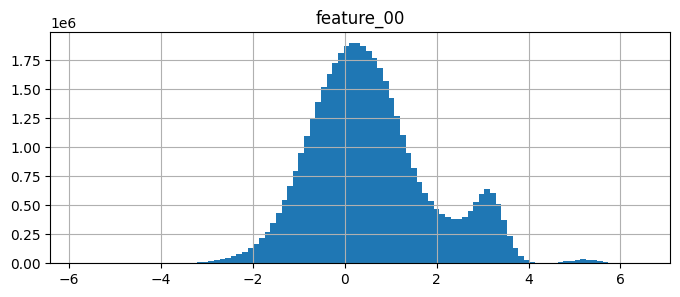

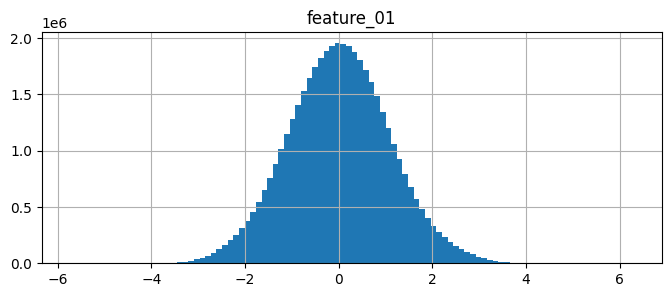

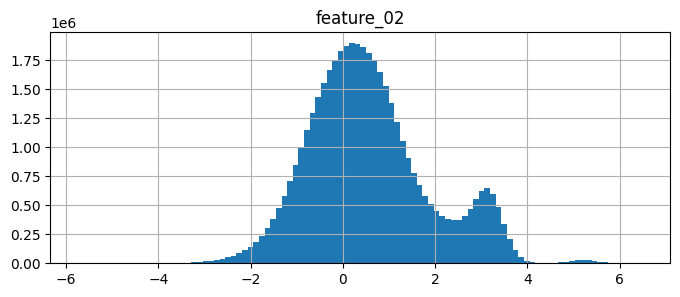

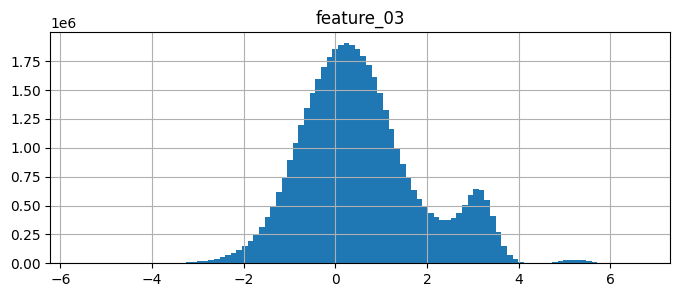

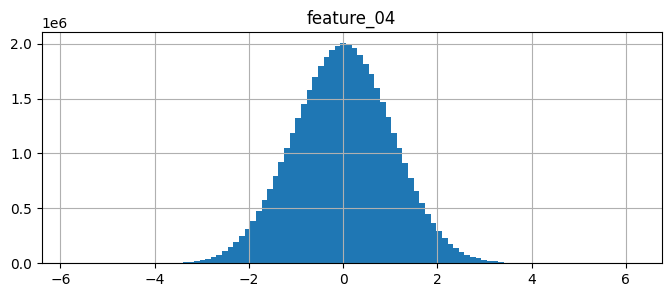

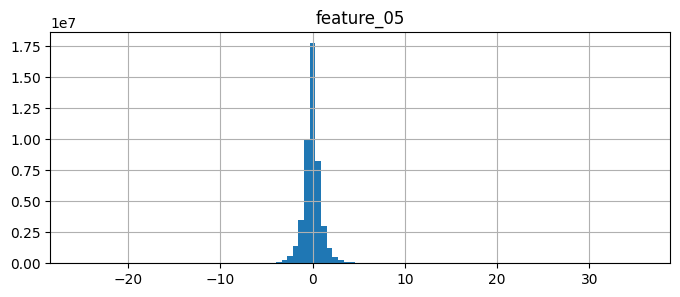

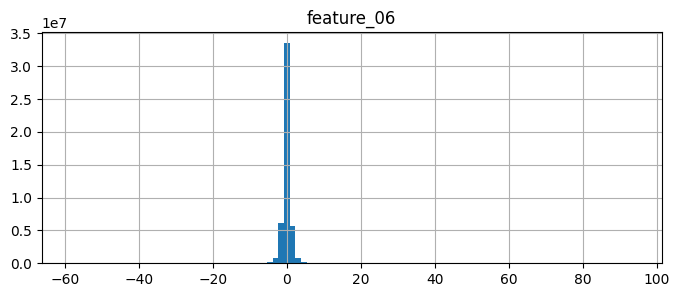

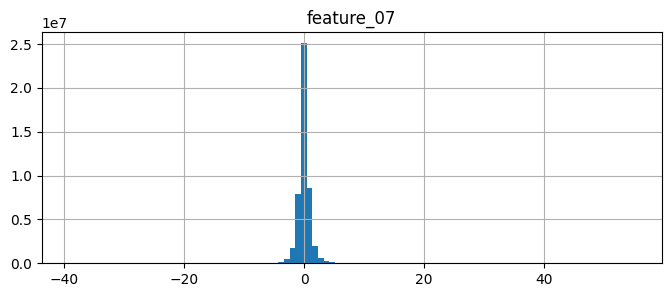

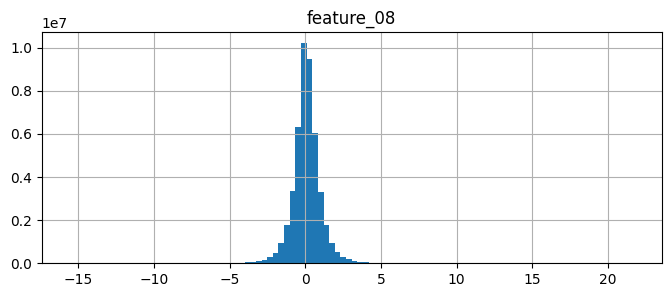

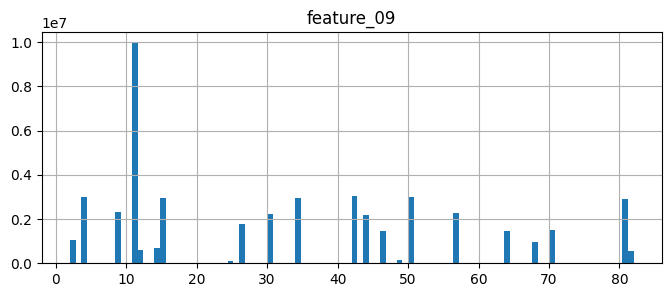

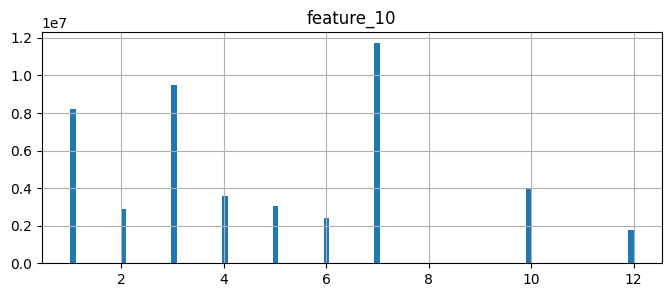

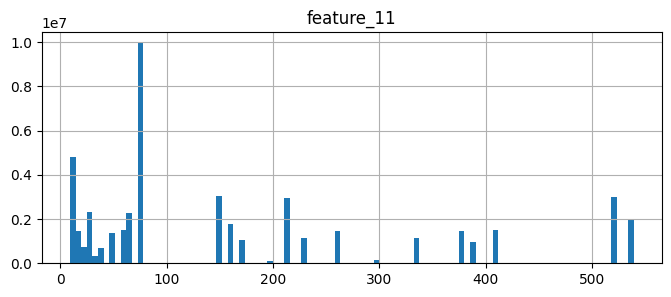

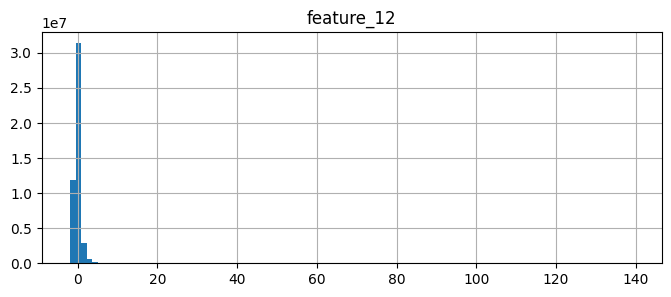

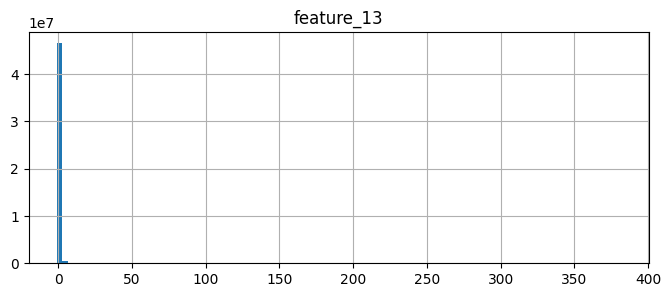

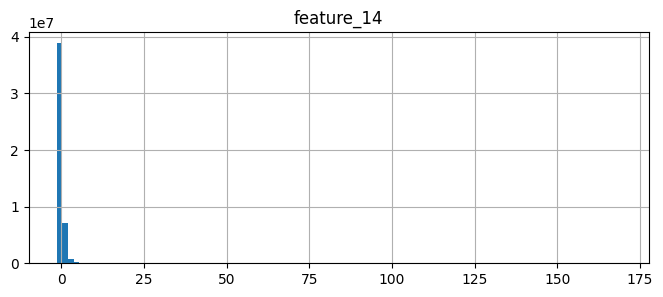

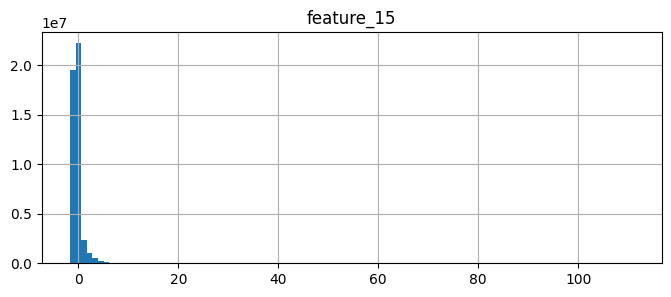

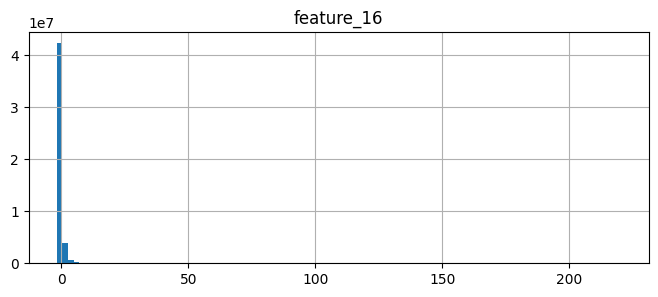

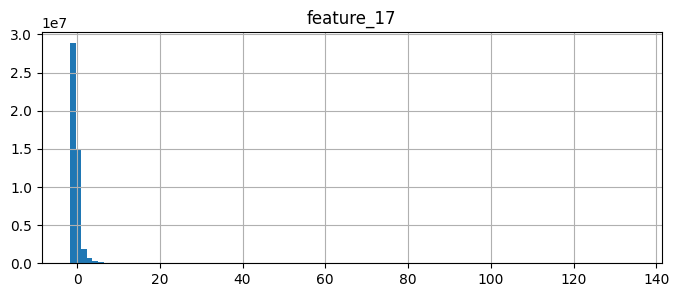

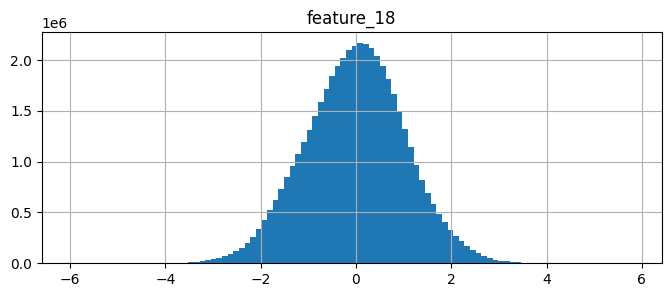

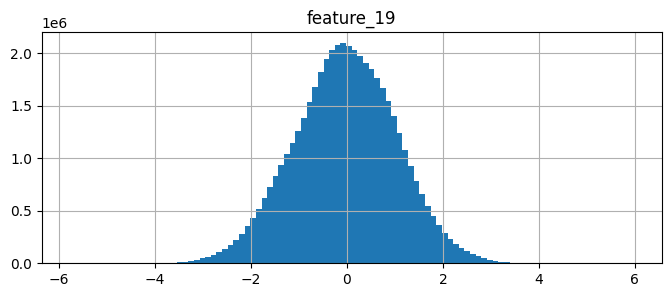

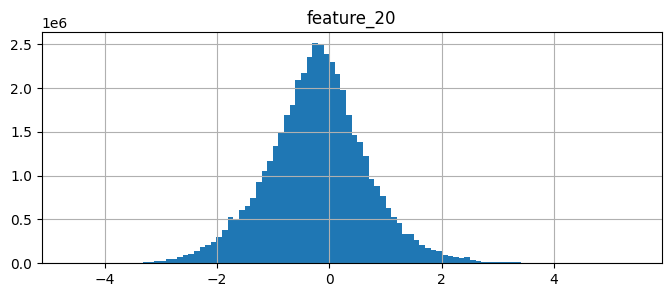

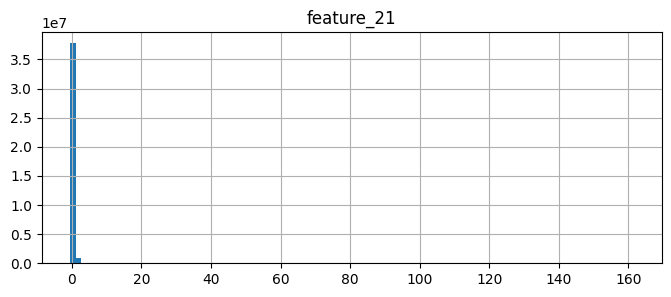

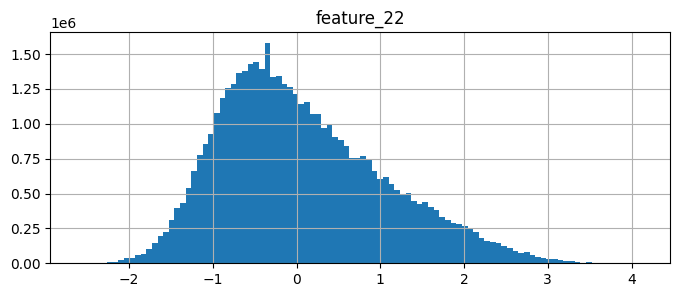

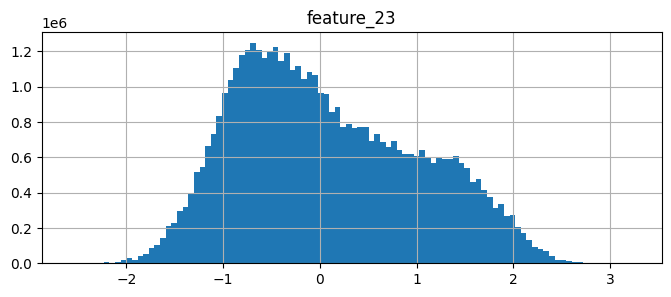

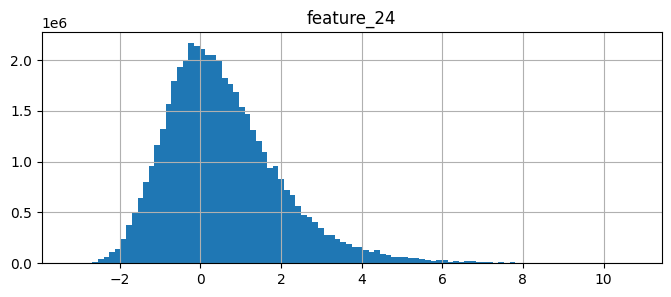

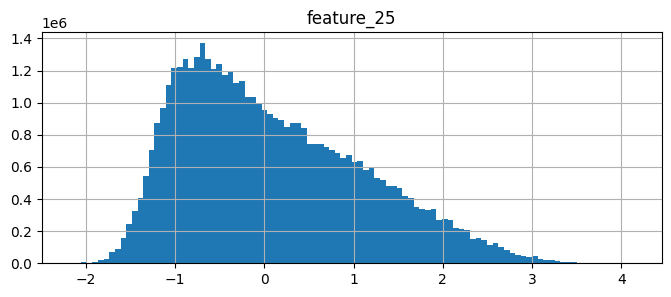

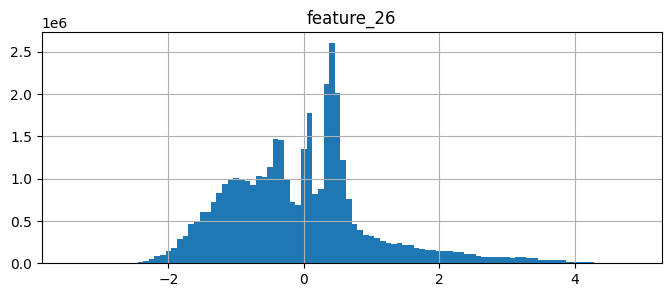

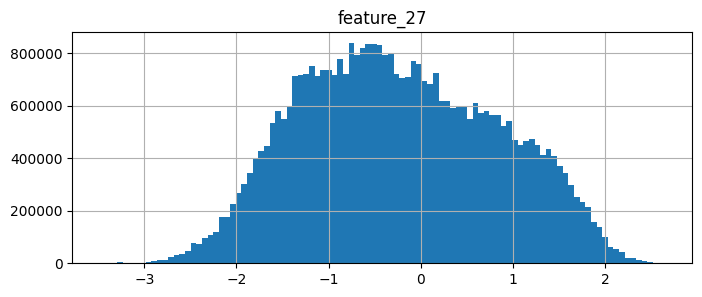

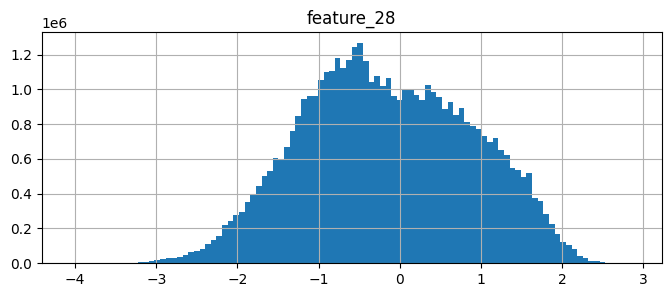

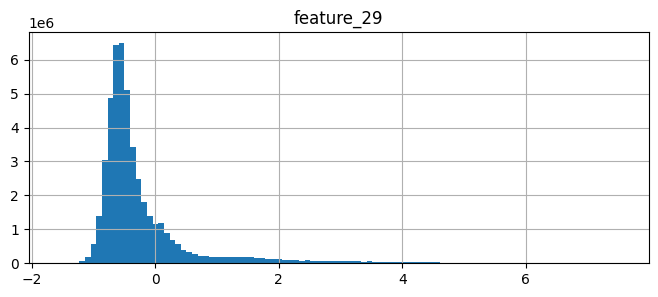

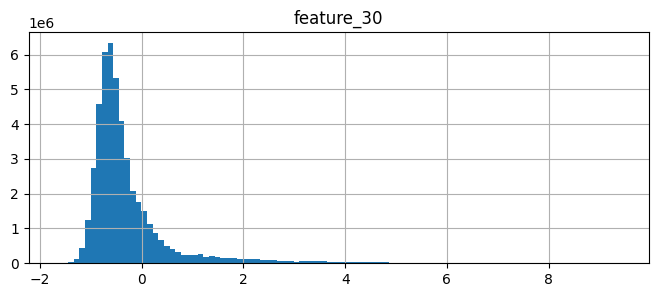

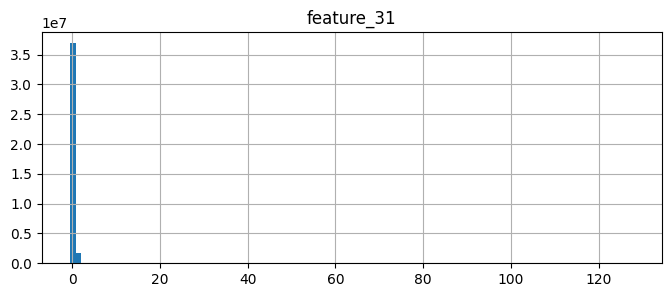

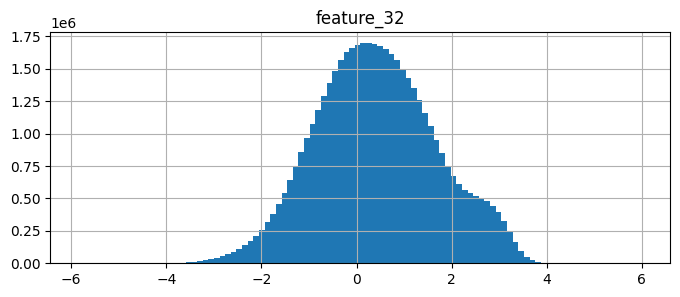

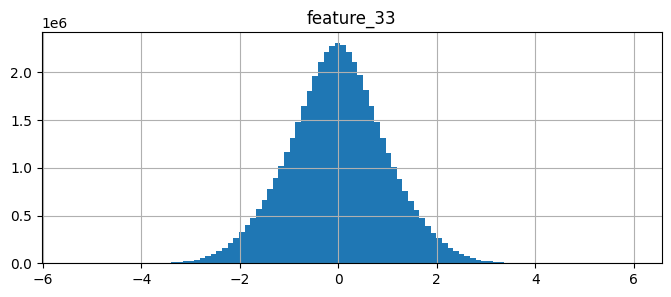

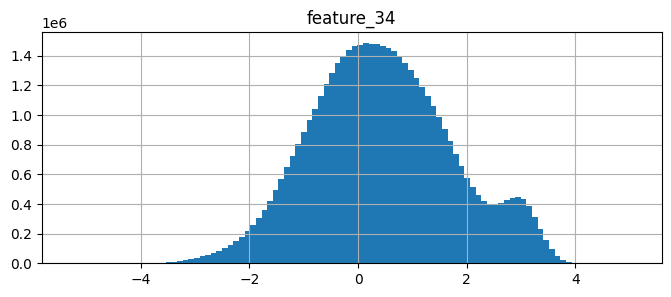

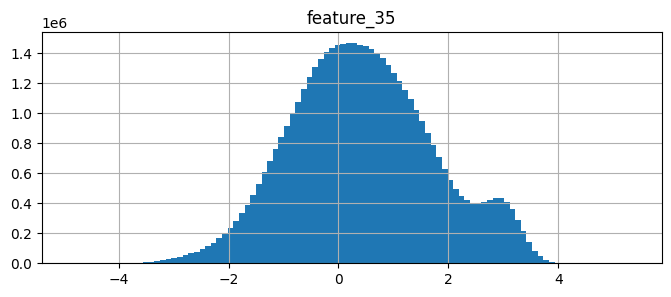

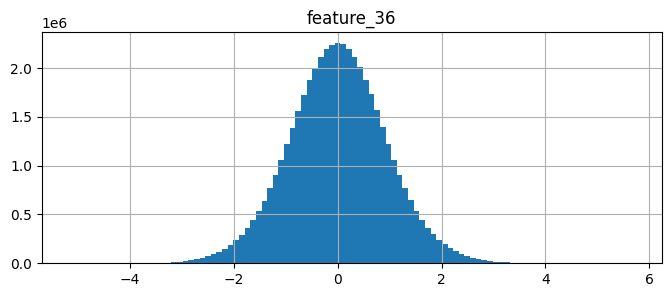

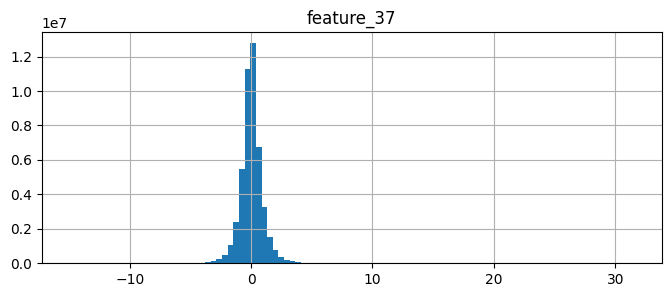

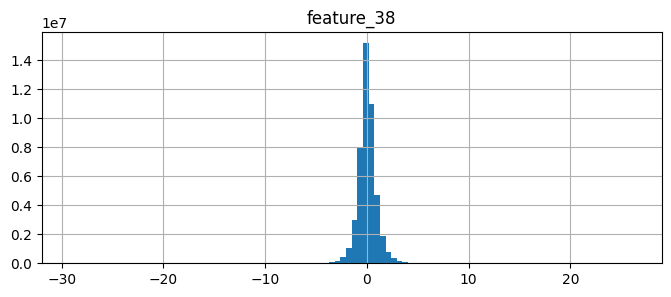

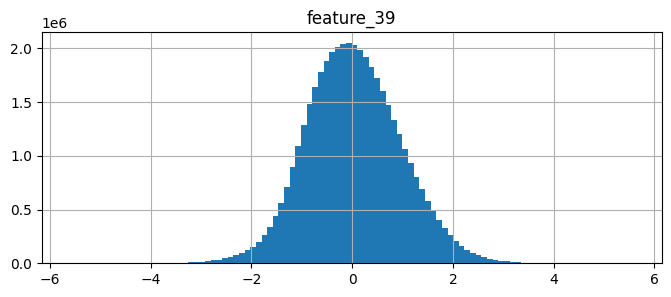

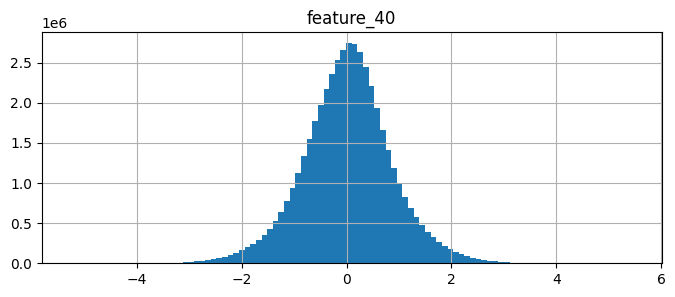

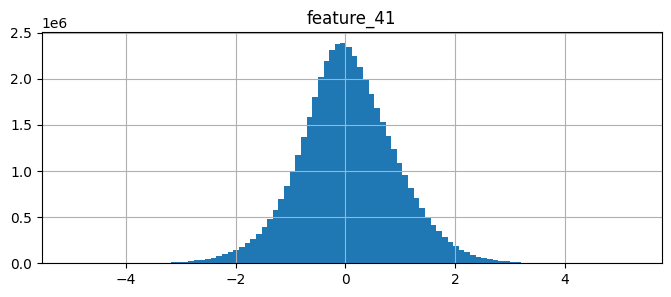

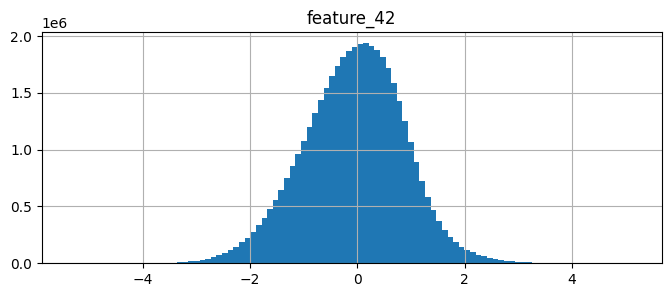

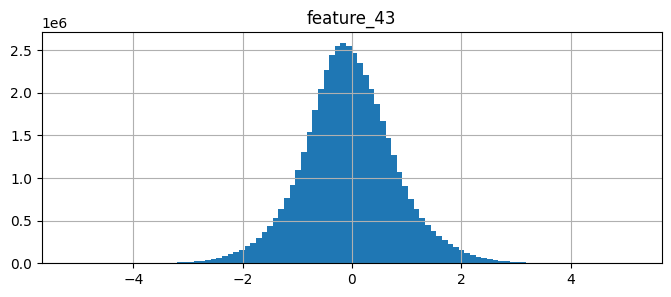

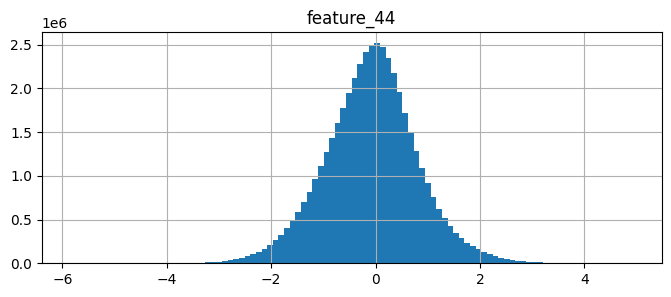

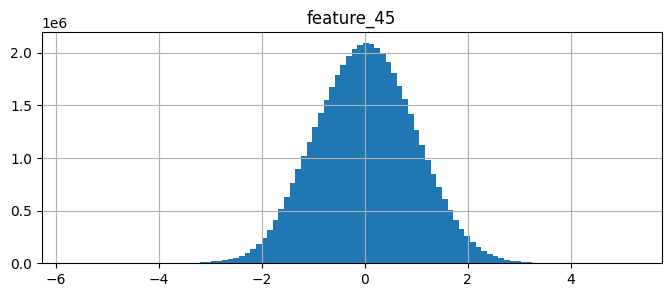

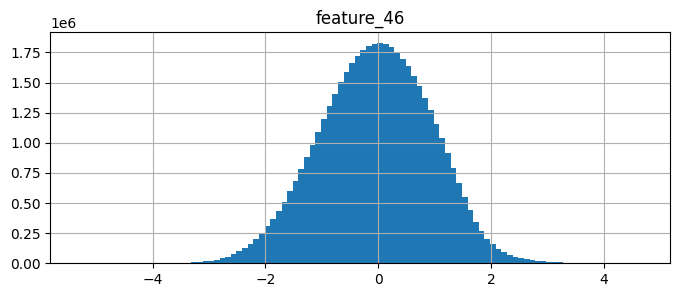

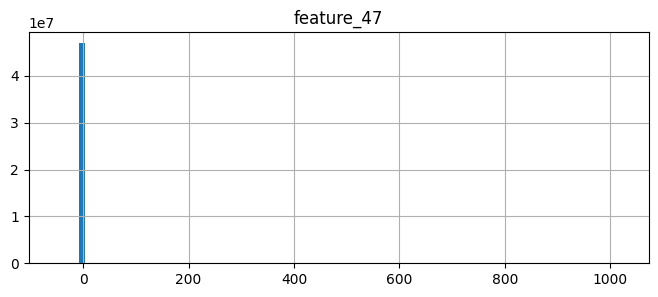

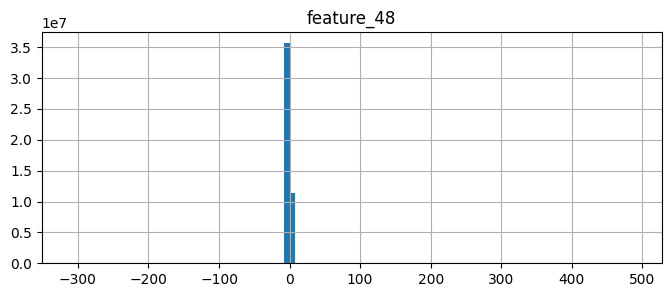

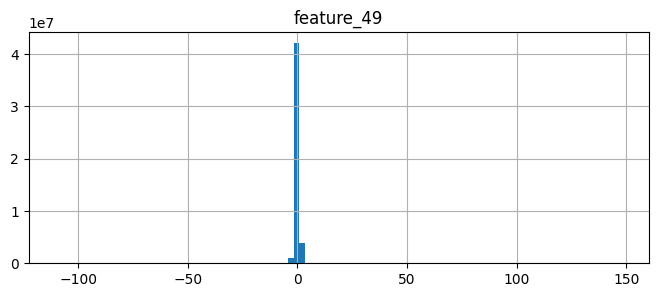

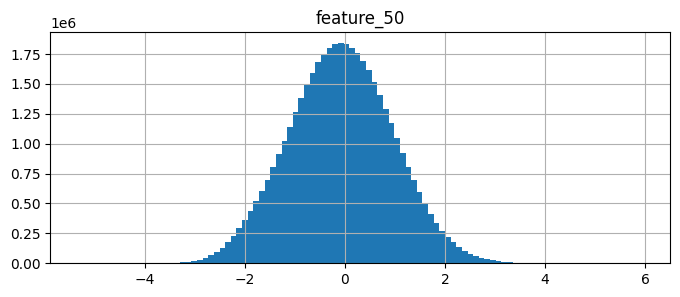

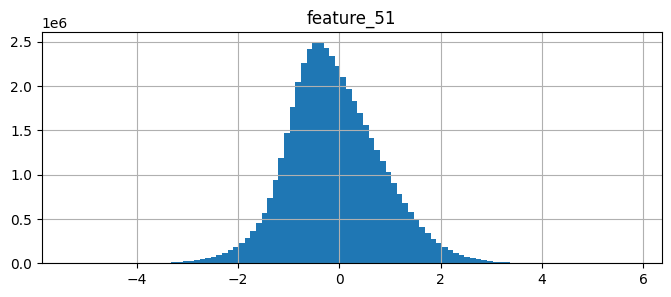

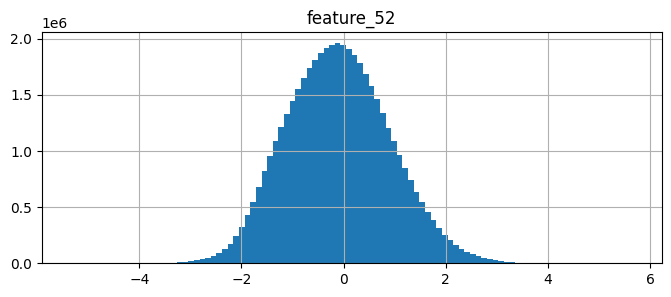

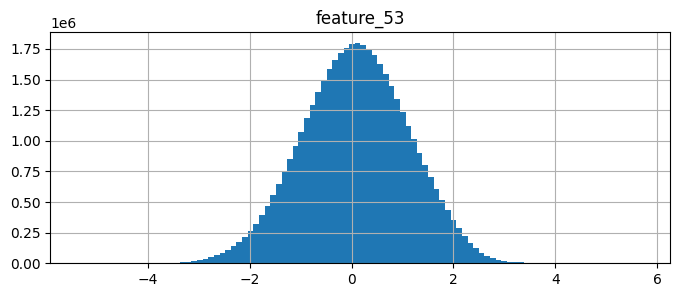

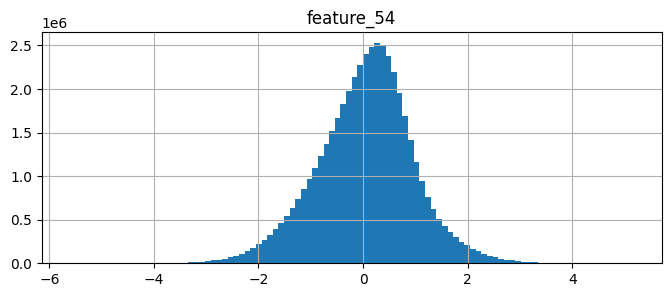

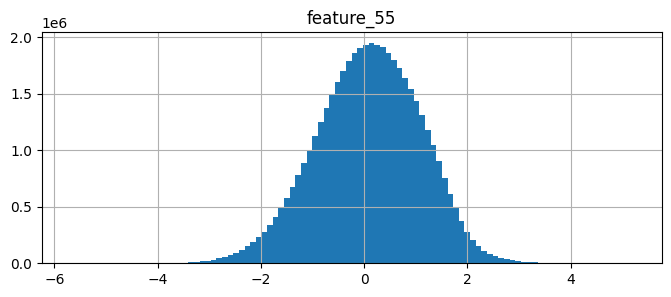

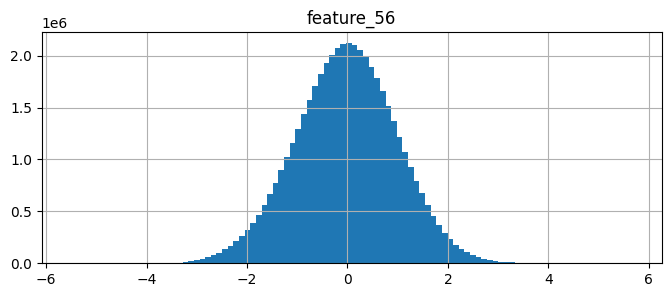

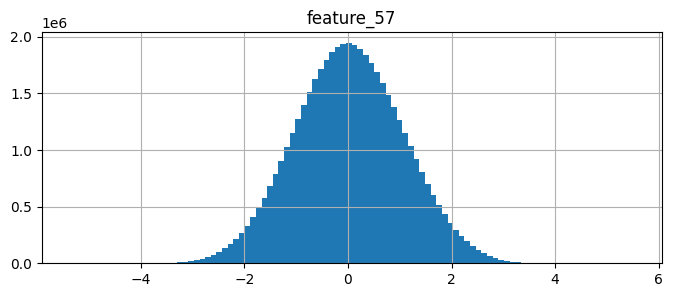

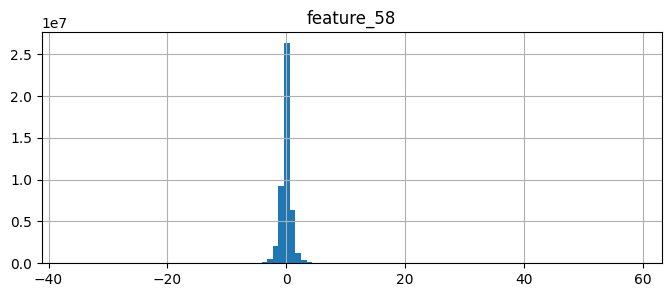

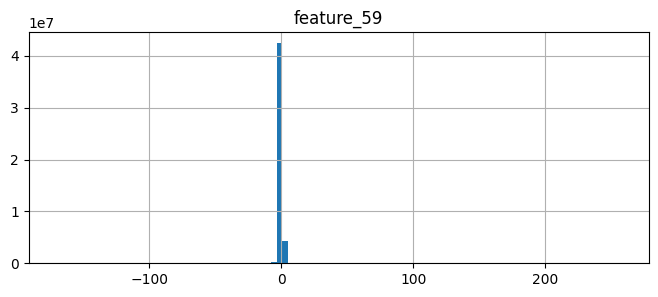

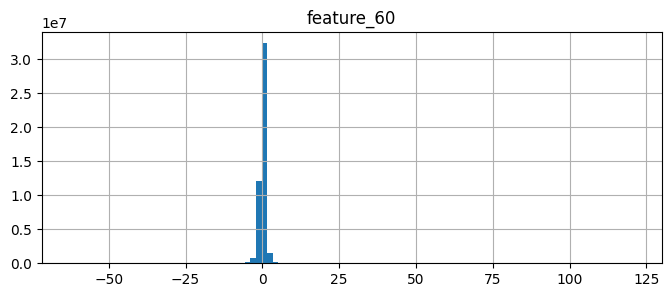

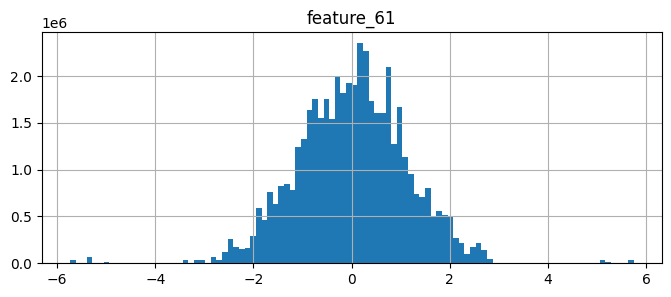

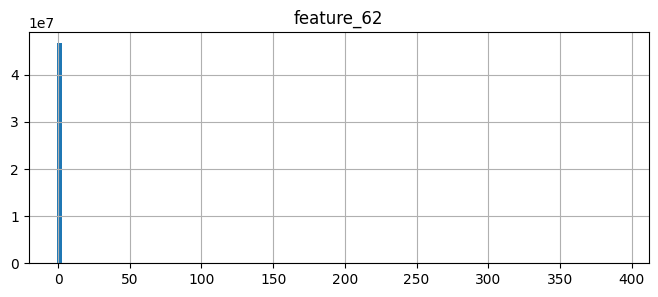

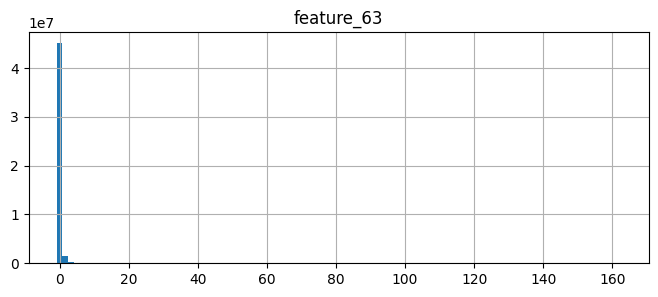

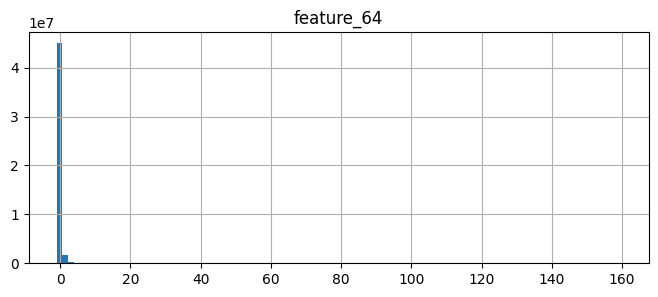

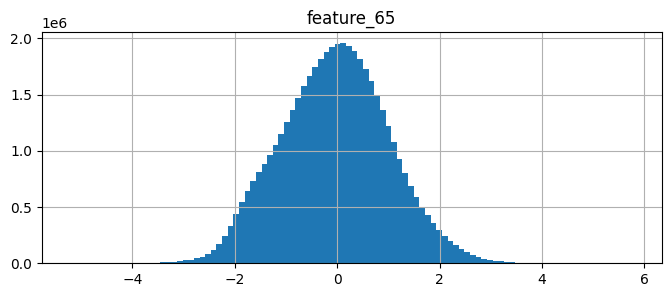

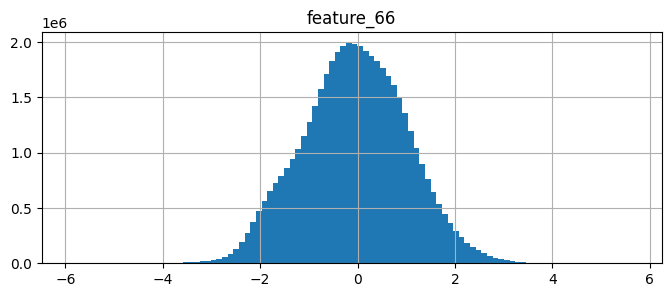

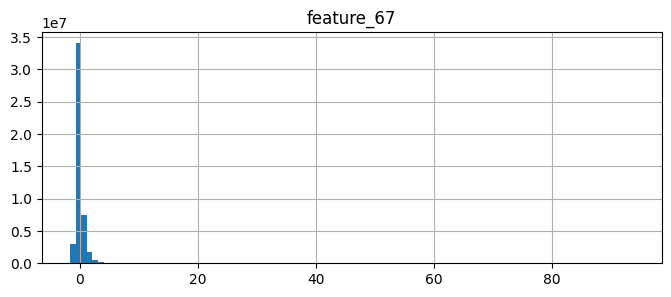

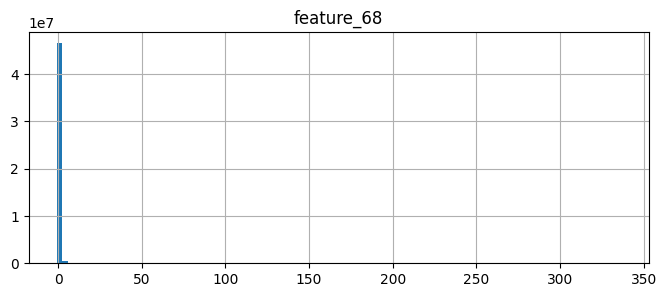

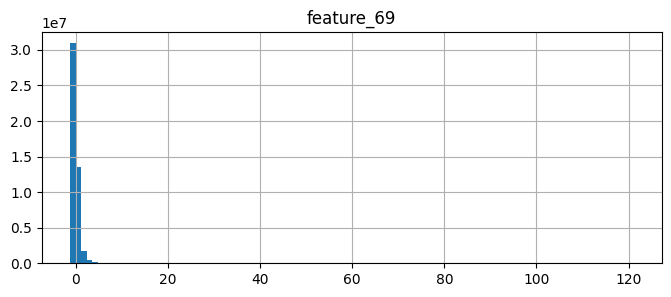

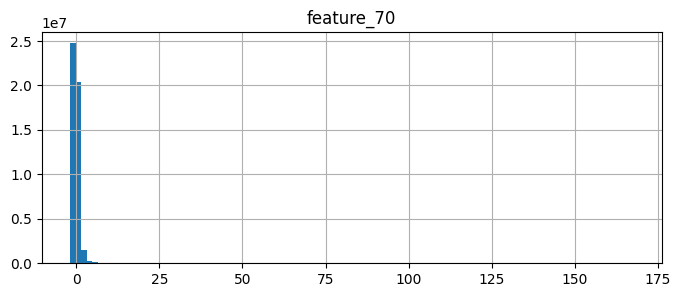

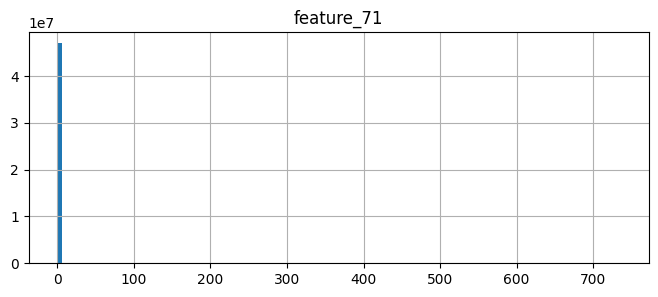

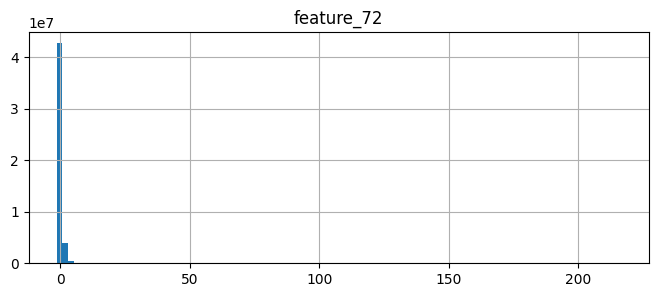

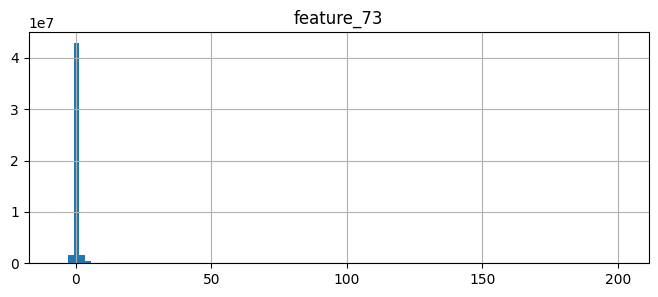

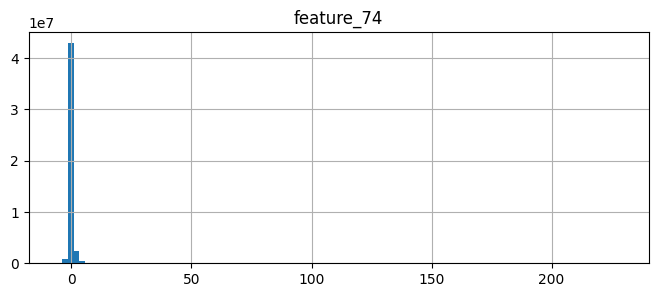

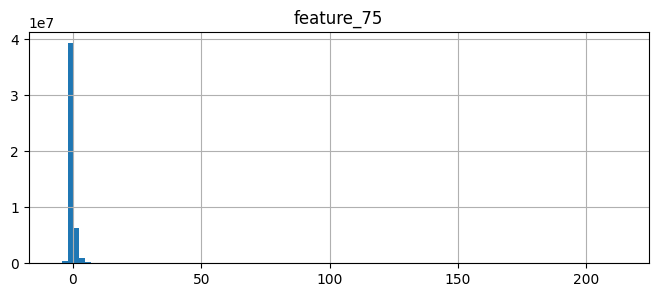

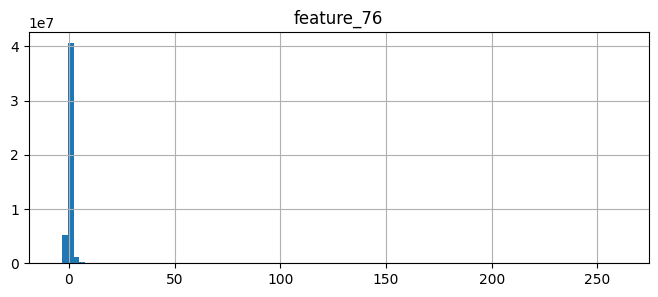

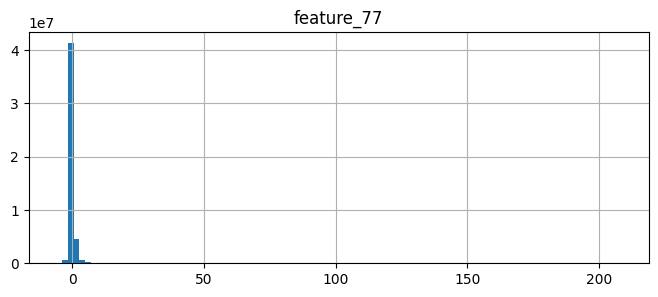

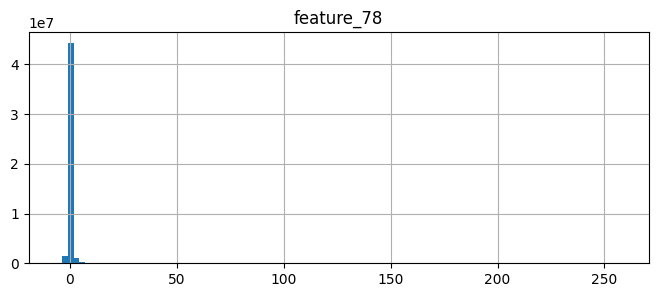

In [8]:
from matplotlib import pyplot as plt


features = ['feature_' + str(x).zfill(2) for x in range(78+1)]

# plot feature distributions
for f in features:
    plt.figure(figsize=(8,3))
    plt.hist(df[f], bins=100)
    plt.title(f)
    plt.grid()
    plt.show()

# Targets

In [6]:
# target names
targets = ['responder_' + str(x) for x in range(8+1)]

In [5]:
# basic stats
df[targets].describe()

statistic,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7,4.7127338e7
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",-0.001545,-0.000866,-0.000142,-0.01638,-0.012442,-0.016624,-0.002141,0.001476,-0.001114
"""std""",0.591211,0.587551,0.599179,0.819231,0.87284,0.734546,0.889852,0.916042,0.864412
"""min""",-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0,-5.0
"""25%""",-0.19025,-0.163768,-0.199878,-0.310065,-0.383654,-0.225414,-0.382761,-0.419719,-0.334288
"""50%""",-0.004543,-0.023831,-0.000862,-0.025754,-0.04469,-0.009662,-0.025566,-0.039172,-0.008617
"""75%""",0.181948,0.127383,0.199062,0.261112,0.313263,0.200578,0.334321,0.355323,0.311202
"""max""",5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


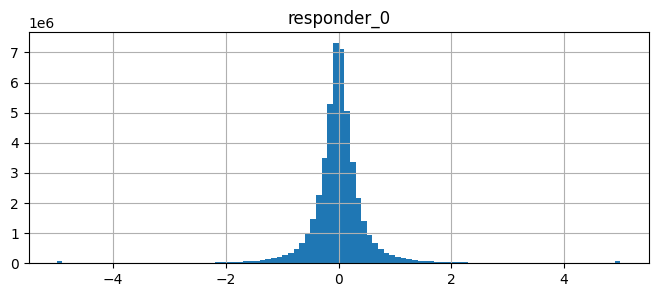

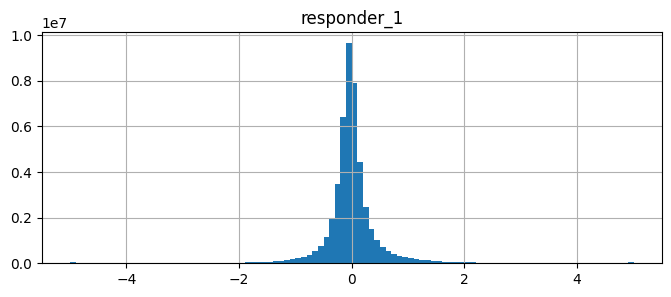

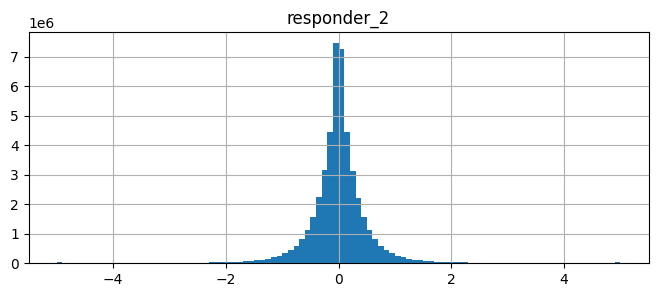

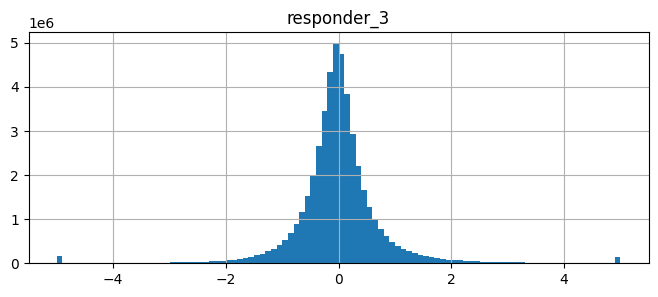

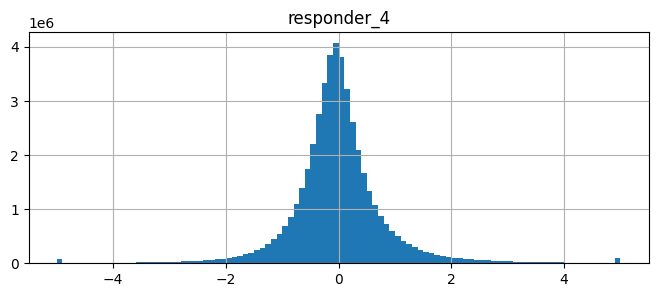

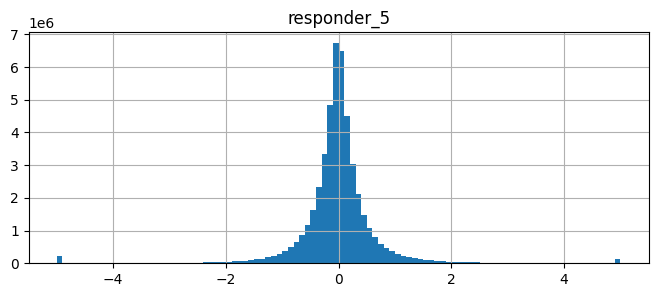

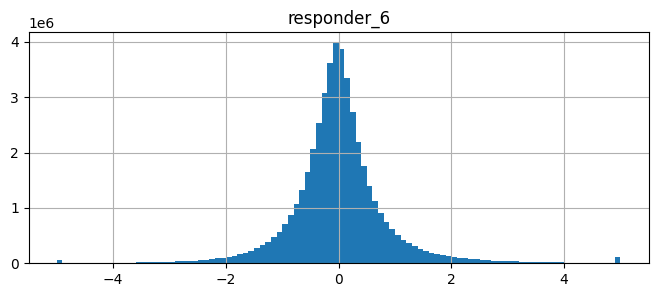

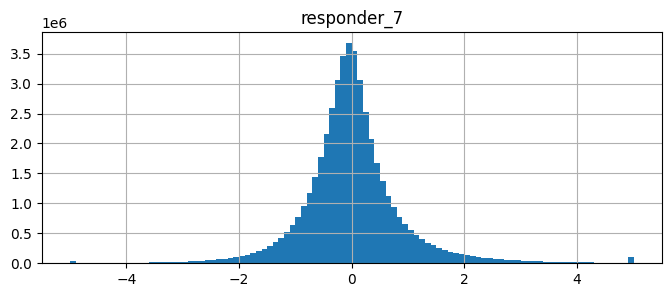

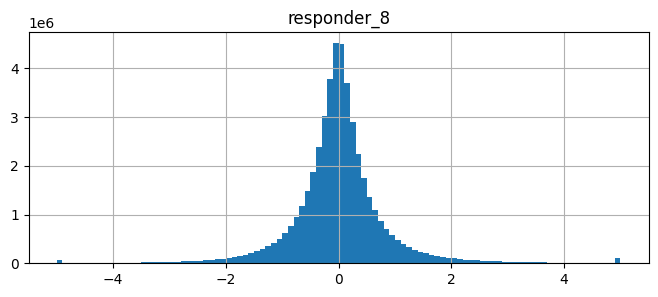

In [12]:
# plot target distributions
for t in targets:
    plt.figure(figsize=(8,3))
    plt.hist(df[t], bins=100)
    plt.title(t)
    plt.grid()
    plt.show()

# Features vs Targets

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import random


# visualize an example pair
num_samples = int(2e6)
random_indices = random.sample(range(len(df)), num_samples)
t = targets[6]

for f in features:
    plt.hist2d(df[f][random_indices], df[t][random_indices], bins=100, cmap='jet', norm=LogNorm());
    plt.colorbar();
    plt.title(f + ' vs. ' + t)
    plt.show();

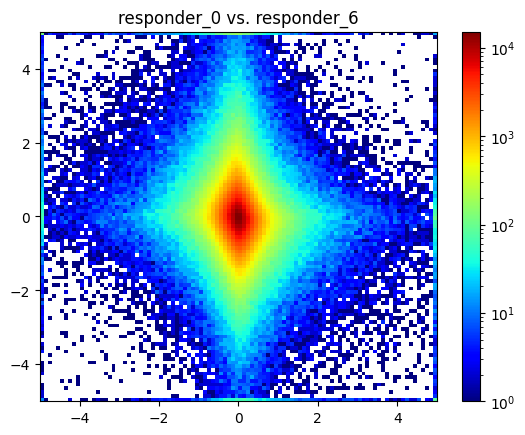

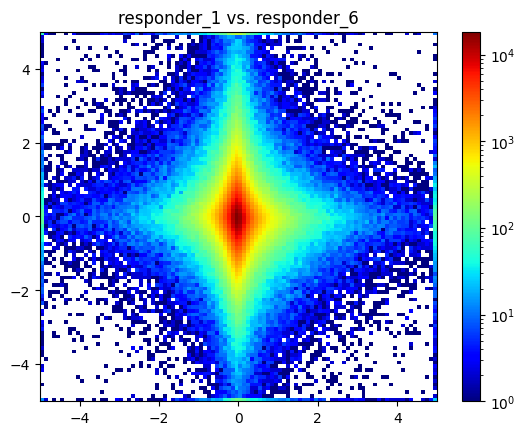

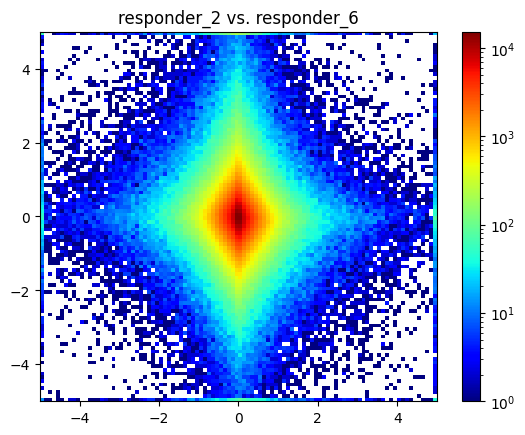

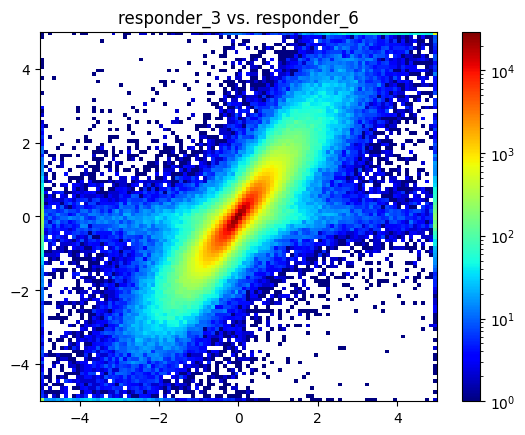

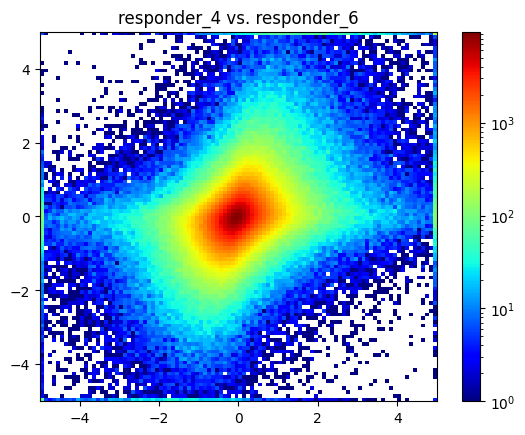

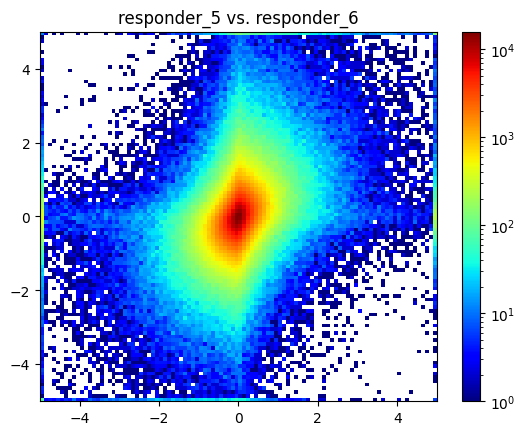

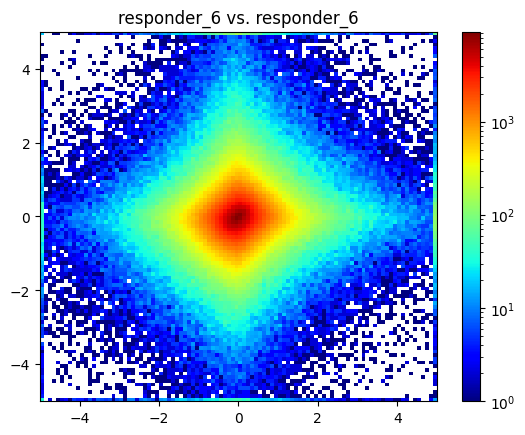

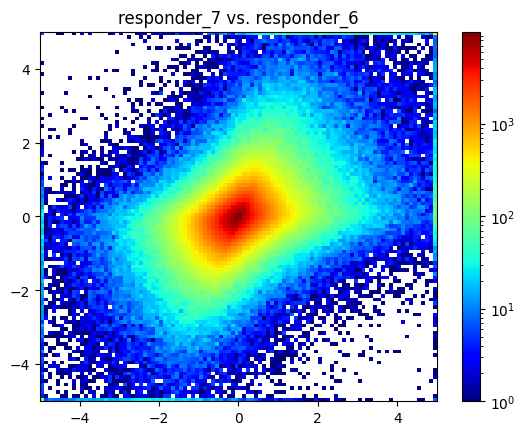

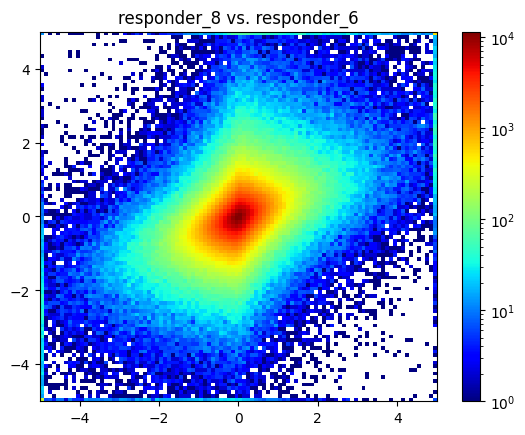

In [57]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import random


# visualize an example pair
num_samples = int(1e6)
random_indices = random.sample(range(len(df)), num_samples)
t = targets[6]

for f in targets:
    indices = random_indices
    if f == t:
        indices = [i - 1 for i in random_indices]
    plt.hist2d(df[f][indices], df[t][random_indices], bins=100, cmap='jet', norm=LogNorm());
    plt.colorbar();
    plt.title(f + ' vs. ' + t)
    plt.show();